<a href="https://colab.research.google.com/github/abhi-lejon/Machine-learning/blob/master/Statistical_Thinking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chi square test for Feature selection**

Here we see feature selection technique for Categorical data

In [ ]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv(r'/content/churn_data_st.csv')

In [ ]:
data=df.copy()

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes


In [ ]:
#Will see the significance of independent categorical variables with the target.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   ServiceCount      7043 non-null   int64  
 5   Contract          7043 non-null   object 
 6   PaperlessBilling  7043 non-null   object 
 7   MonthlyCharges    7043 non-null   float64
 8   TotalCharges      7016 non-null   float64
 9   Churn             7043 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 550.4+ KB


In [ ]:
print('Rows',data.shape[0])
print('Columns',data.shape[1])
print('\nFeatures \n',data.columns.tolist())
print('\nuniquevalues \n',data.nunique())

Rows 7043
Columns 10

Features 
 ['customerID', 'gender', 'SeniorCitizen', 'tenure', 'ServiceCount', 'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn']

uniquevalues 
 customerID          7043
gender                 2
SeniorCitizen          2
tenure                73
ServiceCount           9
Contract               3
PaperlessBilling       2
MonthlyCharges      1585
TotalCharges        6514
Churn                  2
dtype: int64


Null hypothesis: There is no relationship between two categorical variables

Alternate hypothesis: There is a relationship between two categorical variables

In [ ]:
data.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

<Figure size 360x360 with 0 Axes>

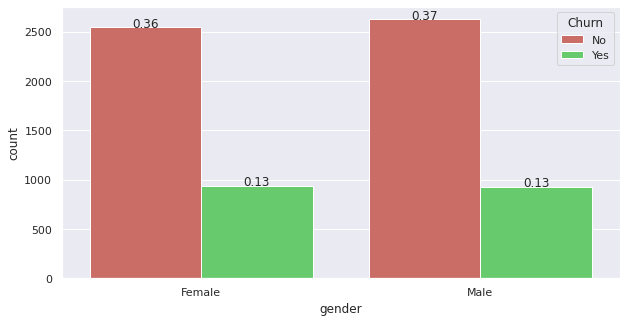

In [ ]:
sns.set(style='darkgrid')
sns.set_palette('hls',3)
plt.figure(figsize=(5,5))
fig,ax=plt.subplots(figsize=(10,5))
ax=sns.countplot(x='gender',hue='Churn',data=data)
#plt.show()
for p in ax.patches:
  height=p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,height,'{:1.2f}'.format(height/data.shape[0]),ha='center')

In [ ]:
#Basically statistics alone cannot prove anything here we use relative likelihood for most of the test.

In [ ]:
#Lets use chisquare test which uses contingency table (cross tab). like by setting alpha or p value.
#Contigency table are used to summarize the relationship between several categorical variables.
gender_chrun_ct=pd.crosstab(index=data.gender,columns=data.Churn)
gender_chrun_ct.iloc[0].values

array([2549,  939])

In [ ]:
gender_chrun_ct

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


In [ ]:
#Now lets run chisquare test using stats package.
#scipy.stats.chi2_contigency(observed,correction=True,lambda=None)[source]
#We use chisquare test of independence

In [ ]:
from scipy import stats
(chi2,p,dof,_)=stats.chi2_contingency([gender_chrun_ct.iloc[0].values,gender_chrun_ct.iloc[1].values],)

In [ ]:
print('chi2',chi2)
print('p',p)
print('dof',dof)#Using dof and chisqaure value we get p value as 0.48 from chi square table.
#More the chisquare value, more the probability that variable is statistically significant.

chi2 0.4840828822091383
p 0.48657873605618596
dof 1


In [ ]:
#As p value is less than 0.05 we appect null hypothesis, that gender is not significant feature.
#The p-value is near 0 it means that you should reject the null hypothesis (H0)
#Statistics alone wont prove anything, so we need to know domain knowledge.
#Also we need to understand the businees also.

In [ ]:
#If the categories are more we can use chi square test like more than 5, cramers v test is the extension of chie square test. cramers tells about the strength.
#If only 2 categories in the variable then we can use fishers exact test.

In [ ]:
#Imputing missing values.

In [ ]:
df[df.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
431,7781-HVGMK,Female,0,72,7,Two year,Yes,65.20,NaN,No
488,4472-LVYGI,Female,0,0,5,Two year,Yes,52.55,NaN,No
753,3115-CZMZD,Male,0,0,7,Two year,No,20.25,NaN,No
936,5709-LVOEQ,Female,0,0,7,Two year,No,80.85,NaN,No
1082,4367-NUYAO,Male,0,0,8,Two year,No,25.75,NaN,No
1261,4741-WWJQZ,Female,0,2,4,Month-to-month,Yes,80.15,NaN,No
1287,8800-ZKRFW,Female,0,30,8,Month-to-month,Yes,107.50,NaN,No
1340,1371-DWPAZ,Female,0,0,6,Two year,No,56.05,NaN,No
1487,5035-PGZXH,Female,0,56,7,One year,Yes,106.80,NaN,No
1846,7369-TRPFD,Male,0,19,7,One year,No,18.80,NaN,No


In [ ]:
df[df['tenure']==0]

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,0,5,Two year,Yes,52.55,NaN,No
753,3115-CZMZD,Male,0,0,7,Two year,No,20.25,NaN,No
936,5709-LVOEQ,Female,0,0,7,Two year,No,80.85,NaN,No
1082,4367-NUYAO,Male,0,0,8,Two year,No,25.75,NaN,No
1340,1371-DWPAZ,Female,0,0,6,Two year,No,56.05,NaN,No
3331,7644-OMVMY,Male,0,0,7,Two year,No,19.85,NaN,No
3826,3213-VVOLG,Male,0,0,8,Two year,No,25.35,NaN,No
4380,2520-SGTTA,Female,0,0,7,Two year,No,20.00,NaN,No
5218,2923-ARZLG,Male,0,0,7,One year,Yes,19.70,NaN,No
6670,4075-WKNIU,Female,0,0,7,Two year,No,73.35,NaN,No


In [ ]:
df['TotalCharges'].describe()

count    7016.000000
mean     2282.589168
std      2265.506114
min        18.800000
25%       401.925000
50%      1397.100000
75%      3792.325000
max      8684.800000
Name: TotalCharges, dtype: float64

In [ ]:
df[df['Churn']=='No'].describe() #Not a convienient way to fill with mean or median, the descriptive statistics as lot of variation.

,SeniorCitizen,tenure,ServiceCount,MonthlyCharges,TotalCharges
count,5174.000000,5174.000000,5174.000000,5174.000000,5147.000000
mean,0.128721,37.569965,5.811751,61.265124,2555.220264
std,0.334923,24.113777,1.890418,31.092648,2328.034938
min,0.000000,0.000000,1.000000,18.250000,18.800000
25%,0.000000,15.000000,4.000000,25.100000,579.200000
50%,0.000000,38.000000,6.000000,64.425000,1685.900000
75%,0.000000,61.000000,7.000000,88.400000,4263.725000
max,1.000000,72.000000,9.000000,118.750000,8672.450000


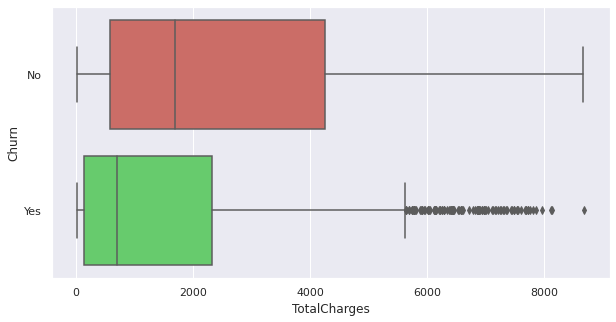

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='TotalCharges',y='Churn',data=df) #Let see the dist in boxplot. If we see the ist quantile is around 500 and mena is 1600 and max value is 8000.
#It doesnent seem to be good. so we need to look for pother way of imputing null values.

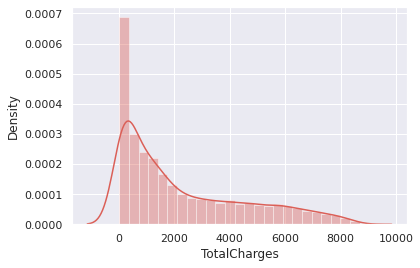

In [ ]:
sns.distplot(df['TotalCharges'],hist=True) #To see the distribution of data.

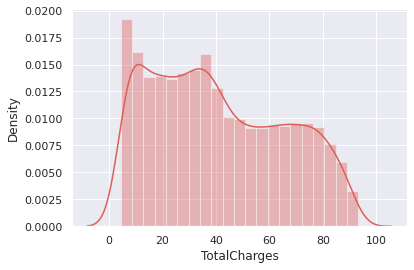

In [ ]:
sns.distplot(df['TotalCharges'].apply(np.sqrt),hist=True) #Lets convert to normal distribution.

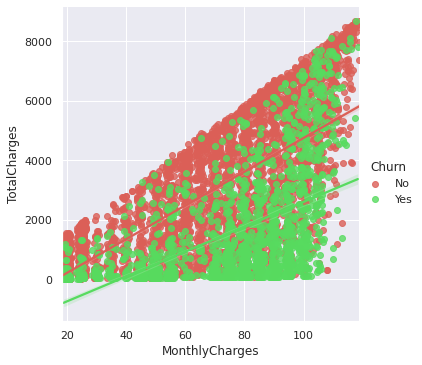

In [ ]:
#Lets see can we impute total charges with monthyly charges column.
sns.lmplot(x='MonthlyCharges',y='TotalCharges',data=df,hue='Churn',fit_reg=True) #Convineint way to fit a regression plot across subset of data.

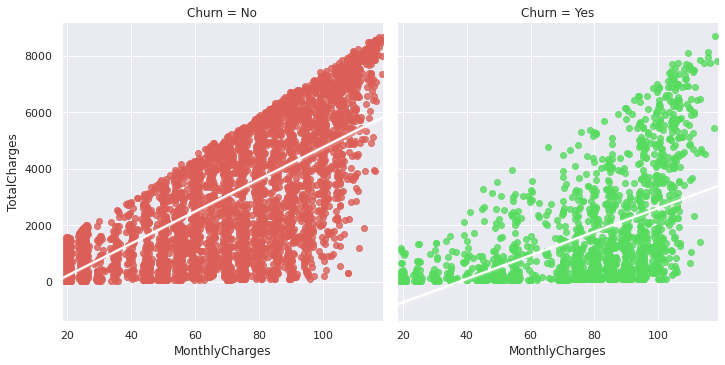

In [ ]:
sns.lmplot(x='MonthlyCharges',y='TotalCharges',data=df,hue='Churn',fit_reg=True,col='Churn',line_kws={'color':'white'}) #When use col=Churn it will create 2 plots for yes and no.
#Here we can see the data is not fitting properly, more error is present in both plots.
#As we are more focused on the churn NO will study that.
#They are not strongly related.

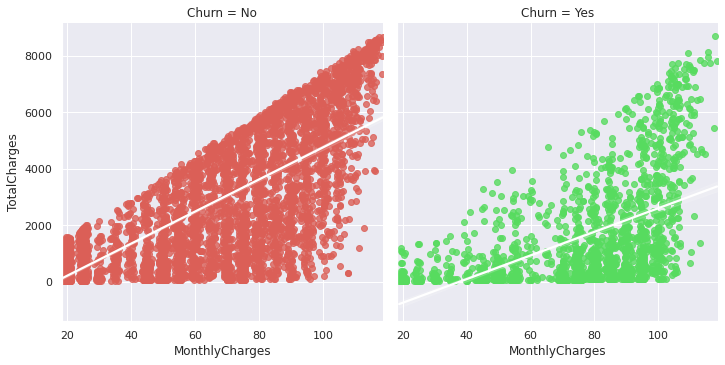

In [ ]:
sns.lmplot(x='MonthlyCharges',y='TotalCharges',data=df,hue='Churn',fit_reg=True,col='Churn',line_kws={'color':'white'}) #When use col=Churn it will create 2 plots for yes and no.

In [ ]:
df[['TotalCharges','MonthlyCharges']].corr() #Lets see the correlation between total charges and monthly charges.
#Its shows 65% correlation. 

,TotalCharges,MonthlyCharges
TotalCharges,1.000000,0.650964
MonthlyCharges,0.650964,1.000000


In [ ]:
df[df['Churn']=='No'][['TotalCharges','MonthlyCharges']].corr() #Corr with Churn No i want to specifically oimput the data for NO churn.

,TotalCharges,MonthlyCharges
TotalCharges,1.00000,0.75739
MonthlyCharges,0.75739,1.00000


In [ ]:
Churn_df_no=df[(df['Churn']=='No')&(df['TotalCharges'].isna()==False)] #use to build a model and go back to null records to impute them.
Churn_df_no.shape[0]

5147

In [ ]:
Churn_df_no.isna().any()

customerID          False
gender              False
SeniorCitizen       False
tenure              False
ServiceCount        False
Contract            False
PaperlessBilling    False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [ ]:
from scipy import stats
slope,intercept,rvalue,pvalue,stderr=stats.linregress(Churn_df_no['MonthlyCharges'],Churn_df_no['TotalCharges'])

In [ ]:
print('slope',slope)
print('intercept',intercept)
print('rvalue',rvalue)
print('pvalue',pvalue)
print('stderr',stderr)
print('R squared',rvalue**2)

slope 56.73637552696062
intercept -922.8160085118097
rvalue 0.7573902887184033
pvalue 0.0
stderr 0.6819261867835148
R squared 0.5736400494449463


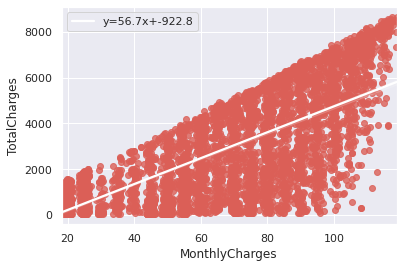

In [ ]:
#Lets see the fitted linear reg.
ax=sns.regplot(x='MonthlyCharges',y='TotalCharges',data=Churn_df_no,line_kws={'color':'white','label':'y={0:.1f}x+{1:.1f}'.format(slope,intercept,rvalue,pvalue,stderr)})
ax.legend(loc='best')

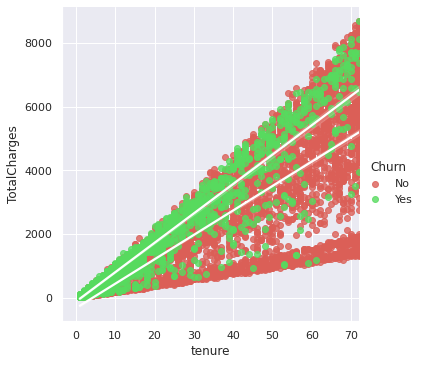

In [ ]:
#Now lets see is there any other variable that explains the variance in total charges better than monthly charges.
sns.lmplot(x='tenure',y='TotalCharges',data=df,hue='Churn',fit_reg=True,line_kws={'color':'white'})

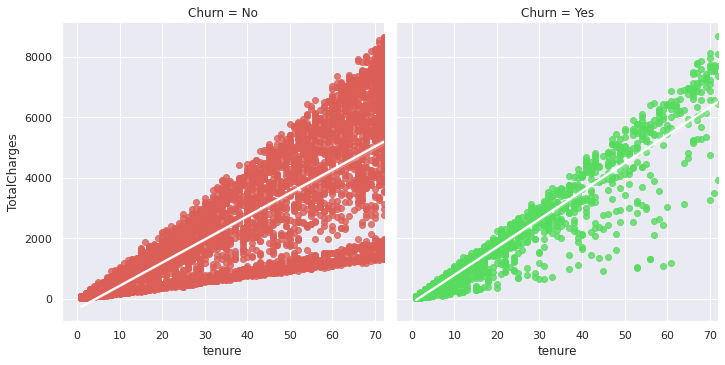

In [ ]:
sns.lmplot(x='tenure',y='TotalCharges',data=df,col='Churn',fit_reg=True,hue='Churn',line_kws={'color':'white'})

In [ ]:
df[['TotalCharges','tenure']].corr()

,TotalCharges,tenure
TotalCharges,1.000000,0.826066
tenure,0.826066,1.000000


In [ ]:
df[df['Churn']=='No'][['TotalCharges','tenure']].corr()

,TotalCharges,tenure
TotalCharges,1.000000,0.793288
tenure,0.793288,1.000000


In [ ]:
slope,intercept,rvalue,pvalue,stderr=stats.linregress(Churn_df_no['tenure'],Churn_df_no['TotalCharges'])

In [ ]:
print('slope',slope)
print('intercept',intercept)
print('rvalue',rvalue)
print('pvalue',pvalue)
print('stderr',stderr)

slope 76.74259761920021
intercept -334.08560506046933
rvalue 0.793287728023258
pvalue 0.0
stderr 0.8211475250987232


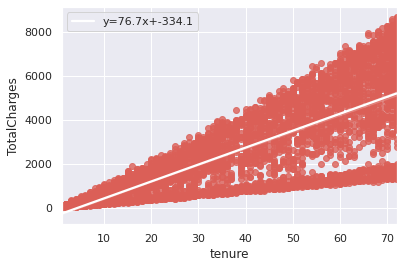

In [ ]:
ax=sns.regplot(x='tenure',y='TotalCharges',data=Churn_df_no,line_kws={'color':'white','label':'y={0:.1f}x+{1:.1f}'.format(slope,intercept,rvalue,pvalue,stderr)})
ax.legend(loc='best')

In [ ]:
Churn_df_no['tenure_charges']=Churn_df_no['MonthlyCharges']*Churn_df_no['tenure']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
Churn_df_no.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,tenure_charges
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No,29.85
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No,1936.30
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No,1903.50
6,1452-KIOVK,Male,0,22,5,Month-to-month,Yes,89.10,1949.40,No,1960.20
7,6713-OKOMC,Female,0,10,2,Month-to-month,No,29.75,301.90,No,297.50


In [ ]:
Churn_df_no[Churn_df_no['Churn']=='No'][['TotalCharges','tenure_charges']].corr()

,TotalCharges,tenure_charges
TotalCharges,1.000000,0.999535
tenure_charges,0.999535,1.000000


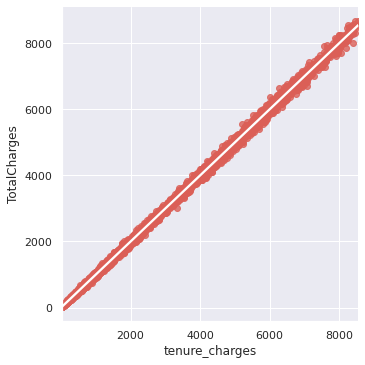

In [ ]:
sns.lmplot(x='tenure_charges',y='TotalCharges',data=Churn_df_no,line_kws={'color':'white'})

In [ ]:
slope,intercept,rvalue,pvalue,stderr=stats.linregress(Churn_df_no['tenure_charges'],Churn_df_no['TotalCharges'])

In [ ]:
print('slope',slope)
print('intercept',intercept)
print('rvalue',rvalue)
print('pvalue',pvalue)
print('stderr',stderr)

slope 1.0001720821518205
intercept -0.3010983695039613
rvalue 0.9995350350972924
pvalue 0.0
stderr 0.00042536192429779864


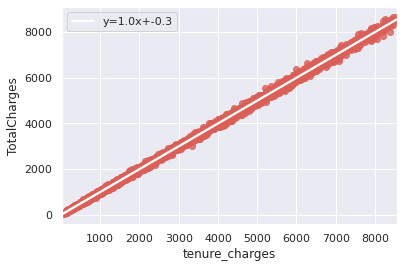

In [ ]:
ax=sns.regplot(x='tenure_charges',y='TotalCharges',data=Churn_df_no,line_kws={'color':'white','label':'y={0:.1f}x+{1:.1f}'.format(slope,intercept,rvalue,pvalue,stderr)})
ax.legend(loc='best')

In [ ]:
def fillna(tenure,MonthlyCharges):
  if tenure==0:
    TotalCharges=MonthlyCharges
  else:
    TotalCharges=tenure*MonthlyCharges
    TotalCharges=intercept+(TotalCharges*slope)
  return round(TotalCharges,2)

In [ ]:
df['NewTotalCharges']=df.apply(lambda x:x['TotalCharges'] if not pd.isna(x['TotalCharges']) else fillna(x['tenure'],x['MonthlyCharges']),axis=1)

In [ ]:
df[df.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,NewTotalCharges
431,7781-HVGMK,Female,0,72,7,Two year,Yes,65.20,NaN,No,265420.43
488,4472-LVYGI,Female,0,0,5,Two year,Yes,52.55,NaN,No,52.55
753,3115-CZMZD,Male,0,0,7,Two year,No,20.25,NaN,No,20.25
936,5709-LVOEQ,Female,0,0,7,Two year,No,80.85,NaN,No,80.85
1082,4367-NUYAO,Male,0,0,8,Two year,No,25.75,NaN,No,25.75
1261,4741-WWJQZ,Female,0,2,4,Month-to-month,Yes,80.15,NaN,No,8172.02
1287,8800-ZKRFW,Female,0,30,8,Month-to-month,Yes,107.50,NaN,No,182052.00
1340,1371-DWPAZ,Female,0,0,6,Two year,No,56.05,NaN,No,56.05
1487,5035-PGZXH,Female,0,56,7,One year,Yes,106.80,NaN,No,338406.10
1846,7369-TRPFD,Male,0,19,7,One year,No,18.80,NaN,No,19343.42


In [ ]:
churn_data_actual=pd.read_excel(r'/content/churn_data_act.xlsx')

In [ ]:
churn_merged=pd.merge(df,churn_data_actual)

In [ ]:
churn_merged[churn_merged.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,NewTotalCharges,TotChargesAct
431,7781-HVGMK,Female,0,72,7,Two year,Yes,65.20,NaN,No,265420.43,4784.45
488,4472-LVYGI,Female,0,0,5,Two year,Yes,52.55,NaN,No,52.55,NaN
753,3115-CZMZD,Male,0,0,7,Two year,No,20.25,NaN,No,20.25,NaN
936,5709-LVOEQ,Female,0,0,7,Two year,No,80.85,NaN,No,80.85,NaN
1082,4367-NUYAO,Male,0,0,8,Two year,No,25.75,NaN,No,25.75,NaN
1261,4741-WWJQZ,Female,0,2,4,Month-to-month,Yes,80.15,NaN,No,8172.02,194.55
1287,8800-ZKRFW,Female,0,30,8,Month-to-month,Yes,107.50,NaN,No,182052.00,3242.50
1340,1371-DWPAZ,Female,0,0,6,Two year,No,56.05,NaN,No,56.05,NaN
1487,5035-PGZXH,Female,0,56,7,One year,Yes,106.80,NaN,No,338406.10,5914.40
1846,7369-TRPFD,Male,0,19,7,One year,No,18.80,NaN,No,19343.42,279.20


In [ ]:
churn_merged.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
tenure               0
ServiceCount         0
Contract             0
PaperlessBilling     0
MonthlyCharges       0
TotalCharges        27
Churn                0
NewTotalCharges      0
TotChargesAct       11
dtype: int64

In [ ]:
churn_merged.drop('TotalCharges',axis=1,inplace=True)

In [ ]:
churn_merged.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
tenure               0
ServiceCount         0
Contract             0
PaperlessBilling     0
MonthlyCharges       0
Churn                0
NewTotalCharges      0
TotChargesAct       11
dtype: int64

Cramers v test

In [ ]:
#Which is used to find the strength between 2 categorical values.
#Pearsons corr coeff used to find the corr between 2 continous variables.

In [ ]:
df1=df.copy()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   ServiceCount      7043 non-null   int64  
 5   Contract          7043 non-null   object 
 6   PaperlessBilling  7043 non-null   object 
 7   MonthlyCharges    7043 non-null   float64
 8   TotalCharges      7016 non-null   float64
 9   Churn             7043 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 550.4+ KB


In [ ]:
df1.corr()

,SeniorCitizen,tenure,ServiceCount,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,-0.090899,0.220173,0.100795
tenure,0.016567,1.000000,0.508526,0.247900,0.826066
ServiceCount,-0.090899,0.508526,1.000000,0.041463,0.443768
MonthlyCharges,0.220173,0.247900,0.041463,1.000000,0.650964
TotalCharges,0.100795,0.826066,0.443768,0.650964,1.000000


<Figure size 360x360 with 0 Axes>

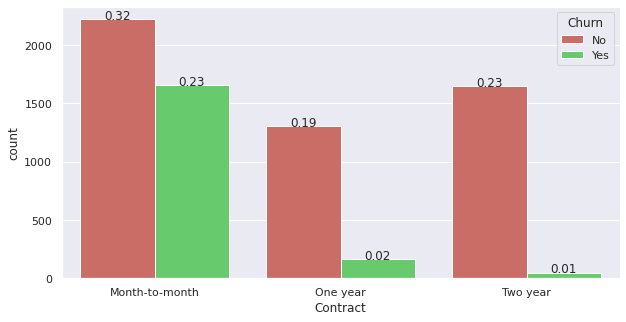

In [ ]:
sns.set(style='darkgrid')
sns.set_palette('hls',3)
plt.figure(figsize=(5,5))
fig,ax=plt.subplots(figsize=(10,5))
ax=sns.countplot(x='Contract',hue='Churn',data=data)
#plt.show()
for p in ax.patches:
  height=p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,height,'{:1.2f}'.format(height/data.shape[0]),ha='center')

In [ ]:
chi2=sum((o-e)^2/e)
cramers v test=sqrt(chi2/(n*(min(C,R)-1)))

In [ ]:
pd.crosstab(index=df1.Contract,columns=df1.Churn,margins='True')
#chi2 shows only siginificancs it wont show strength.

Churn,No,Yes,All
Contract,,,
Month-to-month,2220,1655,3875
One year,1307,166,1473
Two year,1647,48,1695
All,5174,1869,7043


In [ ]:
contract_churn_ct=pd.crosstab(index=df1.Contract,columns=df1.Churn)

In [ ]:
contract_churn_ct

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


In [ ]:
from scipy import stats
(chi2,p,dof,_)=stats.chi2_contingency([contract_churn_ct.iloc[0].values,contract_churn_ct.iloc[1].values,contract_churn_ct.iloc[2].values])

In [ ]:
print('chi2',chi2)
print('p',p)
print('dof',dof)#Using dof and chisqaure value we get p value as 5.86e-258 from chi square table.
#More the chisquare value, more the value that variable is statistically significant.

chi2 1184.5965720837926
p 5.863038300673391e-258
dof 2


In [ ]:
#Its doesnt show the strength, so we go for cramers v test.

In [ ]:
import numpy as np
np.sqrt(chi2/(df.shape[0]))
#cramers v test between 0 to 1, closer to 1 strength is strong. but use comparitive study.

0.4101156965761409

In [ ]:
#Fischers exact test is used when no of observations in category is less than 5.

Normal Distribution Test and Transformation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
import seaborn as sns

from scipy import stats
import statsmodels.api as sm

In [ ]:
df=pd.read_csv(r'/content/marketing_csv_f.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6817 entries, 0 to 6816
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       6817 non-null   object 
 1   State                          6817 non-null   object 
 2   CLV                            6817 non-null   float64
 3   Coverage                       6817 non-null   object 
 4   Income                         6817 non-null   int64  
 5   loc_type                       6817 non-null   object 
 6   monthly_premium                6817 non-null   int64  
 7   months_last_claim              6817 non-null   int64  
 8   Months_Since_Policy_Inception  6817 non-null   int64  
 9   Total_Claim_Amount             6817 non-null   float64
 10  Vehicle_Class                  6817 non-null   object 
 11  avg_vehicle_age                6817 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage:

In [ ]:
df.describe()

,CLV,Income,monthly_premium,months_last_claim,Months_Since_Policy_Inception,Total_Claim_Amount,avg_vehicle_age
count,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000
mean,8130.229340,50456.580461,92.963034,15.046941,47.832624,377.840789,50.126257
std,6949.067972,24305.956566,34.615160,10.064762,27.895350,252.648952,9.919767
min,2119.894333,10037.000000,61.000000,0.000000,0.000000,0.099007,11.875974
25%,4090.750678,28432.000000,68.000000,6.000000,24.000000,210.100003,43.449925
50%,5810.630529,48081.000000,83.000000,14.000000,48.000000,340.800000,50.100924
75%,9075.768214,70187.000000,109.000000,23.000000,71.000000,498.612632,56.877234
max,83325.381190,99981.000000,297.000000,35.000000,99.000000,2893.239678,83.387485


In [ ]:
df.head()

,Customer,State,CLV,Coverage,Income,loc_type,monthly_premium,months_last_claim,Months_Since_Policy_Inception,Total_Claim_Amount,Vehicle_Class,avg_vehicle_age
0,BU79786,Washington,2763.519279,Basic,56274,Suburban,69,32,5,384.811147,Two-Door Car,40.696695
1,AI49188,Nevada,12887.431650,Premium,48767,Suburban,108,18,38,566.472247,Two-Door Car,48.755298
2,HB64268,Washington,2813.692575,Basic,43836,Rural,73,12,44,138.130879,Four-Door Car,70.394474
3,OC83172,Oregon,8256.297800,Basic,62902,Rural,69,14,94,159.383042,Two-Door Car,53.460212
4,XZ87318,Oregon,5380.898636,Basic,55350,Suburban,67,0,13,321.600000,Four-Door Car,32.811507


In [ ]:
df.shape

(6817, 12)

In [ ]:
print('Rows',df.shape[0])
print('Columns',df.shape[1])
print('\nFeatures: \n',df.columns.tolist())
print('\n nunique \n',df.nunique())

Rows 6817
Columns 12

Features: 
 ['Customer', 'State', 'CLV', 'Coverage', 'Income', 'loc_type', 'monthly_premium', 'months_last_claim', 'Months_Since_Policy_Inception', 'Total_Claim_Amount', 'Vehicle_Class', 'avg_vehicle_age']

 nunique 
 Customer                         6817
State                               5
CLV                              5892
Coverage                            3
Income                           5693
loc_type                            3
monthly_premium                   190
months_last_claim                  36
Months_Since_Policy_Inception     100
Total_Claim_Amount               4140
Vehicle_Class                       6
avg_vehicle_age                  6817
dtype: int64


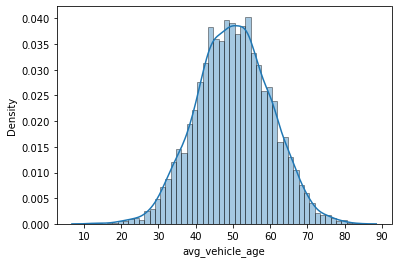

In [ ]:
#Lets start the analysis
sns.distplot(df['avg_vehicle_age'],hist=True,hist_kws=dict(ec='k'))

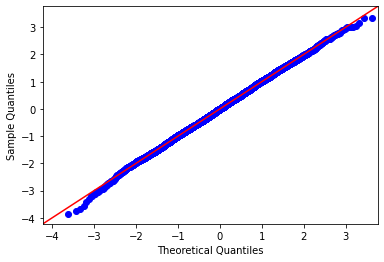

In [ ]:
plot=sm.qqplot(df['avg_vehicle_age'],line='45',fit=True)

((array([-3.71482038, -3.48420977, -3.35734064, ...,  3.35734064,
          3.48420977,  3.71482038]),
  array([11.87597393, 12.97579736, 13.65700265, ..., 81.36779223,
         83.20637063, 83.38748475])),
 (9.922473086072273, 50.12625675651166, 0.9998408439831583))

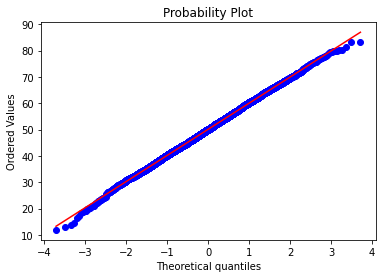

In [ ]:
stats.probplot(df['avg_vehicle_age'],dist='norm',fit=True,plot=plt) #Here the data points falls perfectly on the line, small deviations can be ignored.

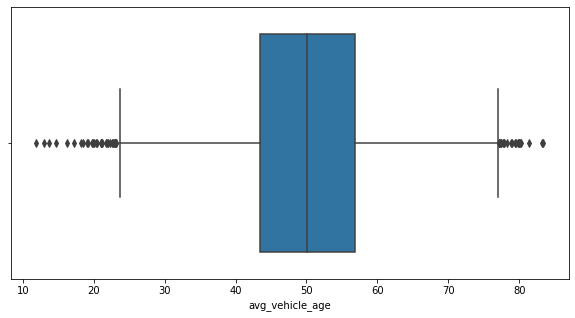

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(df['avg_vehicle_age'],)

In [ ]:
#Now lets run some statistical test to analyse the normality.

H0- Data comes from normal dist

Ha- Unlikely the data comes from normal dist

In [ ]:
chi2,p=stats.normaltest(df['avg_vehicle_age'],)#normal test returns p value and chi2 value.
print('chi2=%.2f ,pvalue=%.2f' %(chi2,p))
#As p value is greater than 0.05, we accept null hypothesis to be true.

chi2=1.04 ,pvalue=0.59


There are many tests available to check the normality. like normal test, anderson test etc.

In [ ]:
#H0- used to test wheather a sample data comes from a population that fallows the specific distribution.
#Ha- Sample data is not cmng from a population that is normal.
stats.anderson(df['avg_vehicle_age'],dist='norm')
#If we take the sig level as 5%, then critical value is 0.787 and tets statistic is 0.383, so we accept the Ho.

AndersonResult(statistic=0.38327277704684093, critical_values=array([0.576, 0.656, 0.787, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [ ]:
#what if our data is not normally distributed. we can apply log,sqrt,boxcox etc to make it normal.

In [ ]:
#Box cox is a transformation of a non normal dependent variable into a normal state.

In [ ]:
_,l=stats.boxcox(df['avg_vehicle_age'])
print('lambda',l)
#By default the boxcox gives two values, first one is the transformed value of the variable(_) and the other lambda.
#But here i dont need transformed values, i need to know which funtion i need to apply so that i can make it normal.

lambda 1.0401662851027633




```
`# This is formatted as code`
```

/content/lambda_values.PNG

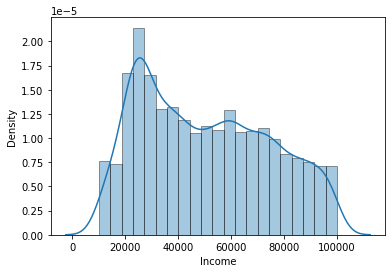

In [ ]:
sns.distplot(df['Income'],hist=True,hist_kws=dict(ec='k'))

In [ ]:
stats.anderson(df['Income'],dist='norm') #As test statistic is greater than critical value, the Ho is rejected.

AndersonResult(statistic=94.67577589421035, critical_values=array([0.576, 0.656, 0.787, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [ ]:
_,l=stats.boxcox(df['Income'])
print('lambda',l)

lambda 0.44437538279540056


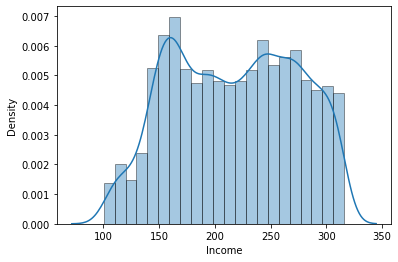

In [ ]:
sns.distplot(df['Income'].apply(lambda x: np.power(x,0.5)),hist=True,hist_kws=dict(ec='k')) #can use lambda value directly or can take exact value also.
#x is the input value and take power of that.

In [ ]:
stats.boxcox(df['Income'].apply(lambda x: np.power(x,0.444)))

(array([127.9899299 , 120.03861732, 114.43876896, ..., 142.86543196,
         83.29420881,  83.87600134]), 1.000845542383073)

In [ ]:
#For negative lambda values we need to pass abs() to work properly.
.apply(lambda x:np.power(x,np.abs(l)))

In [ ]:
#Yes Yoe Johnson is good when we have Negative numbers.
#In sklearn we use function transformer and power transformer
#Function transformer (log,sqrt,square,exp,reciprocal)
#Power transformer (boxcox,yoe johnson)

#Statistical Thinking - Segmentation and Data Analysis

In [ ]:
#Segmentation comes into picture when one population is completely different from other populations in the dataset.
#Like when doing market campaign we target different set of customer likes customer who likes clothes into one group , who likes electronics into other segment.
#If we are not doing segment, then we target randomly to check how the behaviour is.
#Segmentation helps to keep the model simple and can be easily explainable.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
import seaborn as sns

from scipy import stats
import statsmodels.api as sm

In [ ]:
df=pd.read_csv(r'/content/accepted_2007_to_2018Q4.csv')

UnicodeDecodeError: ignored

In [ ]:
df=pd.read_excel(r'/content/loan_analysis.csv.xlsx')

In [ ]:
df.shape

(36, 10)